In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
df.drop(['day','time', 'sex', 'smoker'],axis=1,inplace=True)

In [23]:
df

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [48]:
newdata=df
newdata

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [49]:
X=newdata.iloc[ :,:-1] # fitting the total bill and tip into the X
y=newdata.iloc[ : ,-1:] # fitting the size accordingly into the y

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # form example assigning the values
model.fit(X,y)
model.predict(X)  # this is the actual size calculated by the human

C:\Users\Tayyab\AppData\Local\Temp/ipykernel_6052/923703074.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


array([2, 3, 3, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 3, 3, 3, 3, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       4, 2, 2, 4, 3, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 3, 3,
       2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 3, 2, 3, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 6, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 5, 6, 2, 2, 3, 2, 2, 2, 2, 2, 3, 4,
       4, 5, 6, 4, 2, 4, 4, 2, 3, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 3, 4, 2, 5, 3, 5, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 3, 2, 2, 2, 4, 3, 3, 4, 2, 2, 3, 4, 4, 2, 3, 2, 5, 2, 2, 4,
       2, 2, 1, 3, 2, 2, 2, 4, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 2], dtype=int64)

In [54]:
newdata.tail()

,total_bill,tip,size
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2
243,18.78,3.00,2


In [57]:
# now checking the accuracy prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

predictions = model.predict(X_test)
predictions                                              # this is the accurate possible prediction by the machine learning

array([2, 2, 2, 5, 2, 3, 6, 2, 4, 2, 2, 4, 2, 2, 2, 3, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 4, 3, 2,
       4, 2, 2, 6, 2], dtype=int64)

# The Accuracy Score

In [60]:
score = model.score(X_test, y_test)
print("The Accuracy Score is: ", score)  # 100 percent Accuracy Score

The Accuracy Score is:  1.0


In [61]:
from sklearn import metrics
print("Accuracy: ",metrics.accuracy_score(y_test, predictions))

Accuracy:  1.0


In [63]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)

cm   # due to the small dataset the accuracy value is coming 100percent 

array([[32,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0,  7,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  2]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 1.0')

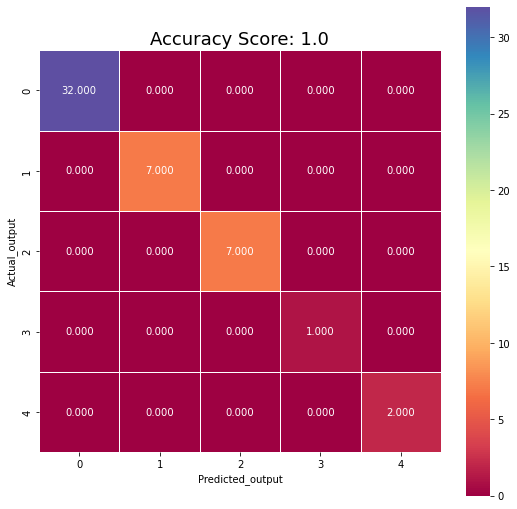

In [66]:
import seaborn as sns
figure=plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths = .5, square = True, cmap = "Spectral");
plt.ylabel("Actual_output");
plt.xlabel("Predicted_output");
Complete_sample_Title = 'Accuracy Score: {0}'.format(score)
plt.title(Complete_sample_Title, size=18)

In [69]:
figure.savefig("sizeaccuracy.png")